In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
import graphviz # tree 시각화
from sklearn.metrics import f1_score# 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/LGaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/LGaimers/test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)

(598, 2881)
(310, 2879)


In [4]:
# 모두 결측치인 변수 제거
def remove_all_nan(dataframe):
  col_list = dataframe.columns
  nan_list = []
  nan_cnt = []
  nan_col = []
  full_list = []

  for col in col_list:
    if dataframe[col].isnull().sum() == 0:
      full_list.append(col)
      continue
    nan_list.append([col,dataframe[col].isnull().sum()])
    nan_cnt.append(dataframe[col].isnull().sum())
    nan_col.append(col)

  del_col = []
  for nan in nan_list:
    if nan[1] == len(dataframe):
      del_col.append(nan[0])
  
  return dataframe.drop(columns=del_col)

# LINE별 dataset 구축

In [5]:
train_T050304 = train_df[train_df['LINE'] == 'T050304']
train_T050307 = train_df[train_df['LINE'] == 'T050307']
train_T100304 = train_df[train_df['LINE'] == 'T100304']
train_T100306 = train_df[train_df['LINE'] == 'T100306']
train_T010306 = train_df[train_df['LINE'] == 'T010306']
train_T010305 = train_df[train_df['LINE'] == 'T010305']

In [6]:
test_T050304 = test_df[test_df['LINE'] == 'T050304']
test_T050307 = test_df[test_df['LINE'] == 'T050307']
test_T100304 = test_df[test_df['LINE'] == 'T100304']
test_T100306 = test_df[test_df['LINE'] == 'T100306']
test_T010306 = test_df[test_df['LINE'] == 'T010306']
test_T010305 = test_df[test_df['LINE'] == 'T010305']

test set에 존재하는 모두 nan인 변수에 대해 -1로 처리하는 것과 없애는 것 중 뭐가 좋은지는 논의해봐야할 것 같습니다.
  - 일단 없애지않고 진행하겠습니다.

In [7]:
print('train T050304 :' ,train_T050304['PRODUCT_CODE'].unique(), 'test T050304 :' ,test_T050304['PRODUCT_CODE'].unique())
print('train T050307 :' ,train_T050307['PRODUCT_CODE'].unique(), 'test T050307 :' ,test_T050307['PRODUCT_CODE'].unique())
print('train T100304 :' ,train_T100304['PRODUCT_CODE'].unique(), 'test T100304 :' ,test_T100304['PRODUCT_CODE'].unique())
print('train T100306 :' ,train_T100306['PRODUCT_CODE'].unique(), 'test T100306 :' ,test_T100306['PRODUCT_CODE'].unique())
print('train T010306 :' ,train_T010306['PRODUCT_CODE'].unique(), 'test T010306 :' ,test_T010306['PRODUCT_CODE'].unique())
print('train T010305 :' ,train_T010305['PRODUCT_CODE'].unique(), 'test T010305 :' ,test_T010305['PRODUCT_CODE'].unique())


train T050304 : ['A_31'] test T050304 : ['A_31']
train T050307 : ['A_31'] test T050307 : ['A_31']
train T100304 : ['T_31' 'O_31'] test T100304 : ['T_31' 'O_31']
train T100306 : ['T_31' 'O_31'] test T100306 : ['T_31' 'O_31']
train T010306 : ['A_31'] test T010306 : ['A_31']
train T010305 : ['A_31'] test T010305 : ['A_31']


In [8]:
# A 생성 LINE
train_T050304, test_T050304
train_T050307, test_T050307
train_T010306, test_T010306
train_T010305, test_T010305

# T, O 생성 LINE
train_T100304, test_T100304
train_T100306, test_T100306

(    PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
 26   TRAIN_026        1   0.531992   2022-06-19 9:20  T100306         T_31   
 30   TRAIN_030        1   0.528646  2022-06-19 23:39  T100306         T_31   
 36   TRAIN_036        1   0.529633   2022-06-22 3:39  T100306         T_31   
 42   TRAIN_042        1   0.530965   2022-06-23 3:39  T100306         T_31   
 43   TRAIN_043        1   0.529498   2022-06-23 6:28  T100306         T_31   
 ..         ...      ...        ...               ...      ...          ...   
 589  TRAIN_589        1   0.529510  2022-09-06 18:00  T100306         T_31   
 590  TRAIN_590        1   0.529948   2022-09-07 1:01  T100306         T_31   
 591  TRAIN_591        1   0.529308   2022-09-07 1:09  T100306         T_31   
 593  TRAIN_593        1   0.526546  2022-09-08 14:30  T100306         T_31   
 597  TRAIN_597        1   0.533702  2022-09-08 14:46  T100306         O_31   
 
       X_1   X_2  X_3   X_4  ...  X_2866  X_2867  

## LINE별 train set은 최대한 구축 = 모두 NaN이 아니라면 mice을 적용
  - 단 y_class별로 나눠서 적용하는게 합리적인듯
  - mice 적용시 메모리 초과가 나기 때문에 최대한 변수를 줄여줘야할듯

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
train_T050307_0 = train_T050307[train_T050307['Y_Class'] == 0]
train_T050307_0 = remove_all_nan(train_T050307_0)
train_T050307_0 = train_T050307_0.drop(columns=['PRODUCT_ID','TIMESTAMP','PRODUCT_CODE','Y_Class','Y_Quality'])

In [ ]:
train_T050307_0 = pd.get_dummies(train_T050307_0)

In [ ]:
train_T050307_0 = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(train_T050307_0))

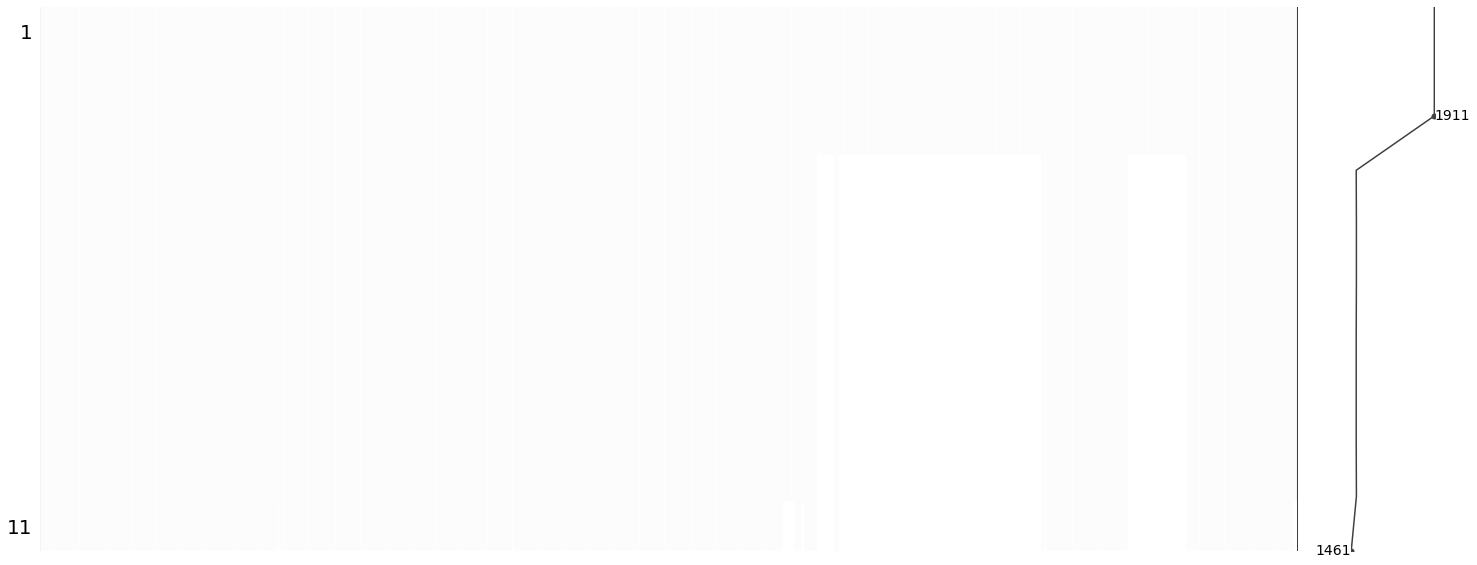

In [ ]:
import missingno as msno
msno.matrix(train_T050307_0)

In [ ]:
train_T050307_0 = train_T050307[train_T050307['Y_Class'] == 0]
train_T050307_0 = train_T050307_0.fillna(train_T050307_0.mean())

train_T050307_1 = train_T050307[train_T050307['Y_Class'] == 1]
train_T050307_1 = train_T050307_1.fillna(train_T050307_1.mean())

train_T050307_2 = train_T050307[train_T050307['Y_Class'] == 2]
train_T050307_2 = train_T050307_2.fillna(train_T050307_2.mean())

train_T050307= pd.concat([train_T050307_0,train_T050307_1,train_T050307_2]).sort_values(by='PRODUCT_ID')